In [25]:
#importando principais bibliotecas
import numpy as np
import matplotlib.pyplot as plt

In [26]:
#Carregando o catálogo ALFALFA e definindo os parâmetros

data = np.genfromtxt('data.csv', names=True, delimiter=',')

alfa  = data['RAdeg_HI']
delta = data['DECdeg_HI'] 
veloc = data['Vhelio'] #velocidade
code  = data['HIcode'] #qualidade de sinal
dist  = data['Dist'] #distância

In [27]:
# removendo hemisferio sul e outros codigos

x = alfa[(code==1.)&(veloc>0.)&(veloc<6000.)&(dist<85.)&(dist>20.)]
y = delta[(code==1.)&(veloc>0.)&(veloc<6000.)&(dist<85.)&(dist>20.)]
d = dist[(code==1.)&(veloc>0.)&(veloc<6000.)&(dist<85.)&(dist>20.)]

c1 = (y>0.) & (y<36.)

x1 = x[c1]
y1 = y[c1]
d1 = d[c1]

c2 = (x1>50.) & (x1<110.)

x2 = np.delete(x1, c2)
y2 = np.delete(y1, c2)
d2 = np.delete(d1, c2)

c3 = (x2>250.) & (x2<325.)

x3 = np.delete(x2, c3)
y3 = np.delete(y2, c3)
d3 = np.delete(d2, c3)

c4 = (x3>110.) & (x3<140.) & (y3>18.) & (y3<24.)

x4 = np.delete(x3, c4)
y4 = np.delete(y3, c4)
d4 = np.delete(d3, c4)

c5 = (x4>232.) & (x4<250.) & (y4>18.) & (y4<24.)

x5 = np.delete(x4, c5)
y5 = np.delete(y4, c5)
d5 = np.delete(d4, c5)

c6 = (x5>232.) & (x5<250.) & (y5>32.) & (y5<36.)

x6 = np.delete(x5, c6)
y6 = np.delete(y5, c6)
d6 = np.delete(d5, c6)

c7 = (x6>110.) & (x6<140.) & (y6>32.) & (y6<36.)

x7 = np.delete(x6, c7)
y7 = np.delete(y6, c7)
d7 = np.delete(d6, c7)

In [28]:
len(x7)

6883

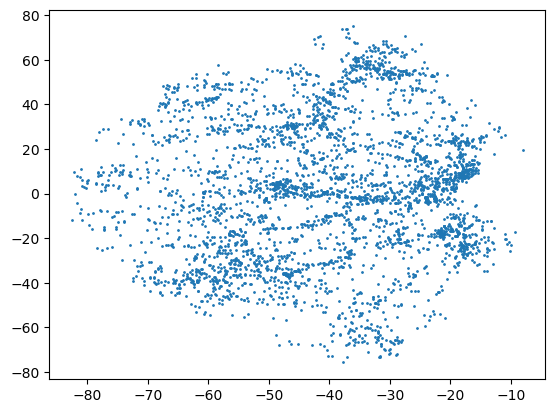

In [29]:
#numero de densidade de pontos do catalogo

dH = np.histogram(d7, bins=20)

dN = dH[0]
dr = dH[1]

rb = (dr[1:] + dr[:-1]) * 0.5
fsky = 4500. / 41253

dV = 4. * np.pi * fsky * (rb ** 2) * (dr[1:]-dr[:-1])

n = dN / dV

P0 = 0  # Para pesos serem todos iguais a 1

w = 1. / (1. + (n * P0))

#Interpolação cúbica dos pesos

from scipy.interpolate import CubicSpline

def fw(x):
    
    fw = CubicSpline(rb, w)
    
    return fw(x)

x = np.linspace(min(rb), max(rb), 1000)

#plt.plot(x, fw(x), color='red')

from astropy.coordinates import spherical_to_cartesian

X, Y, Z = spherical_to_cartesian(d7, np.deg2rad(y7), np.deg2rad(x7))

H = X[X<0], Y[X<0], Z[X<0], fw(d7[X<0])

np.savetxt('data.dat', np.transpose(H), delimiter='\t',
           header='x y z w')

plt.scatter(X[X<0], Y[X<0], s=1)

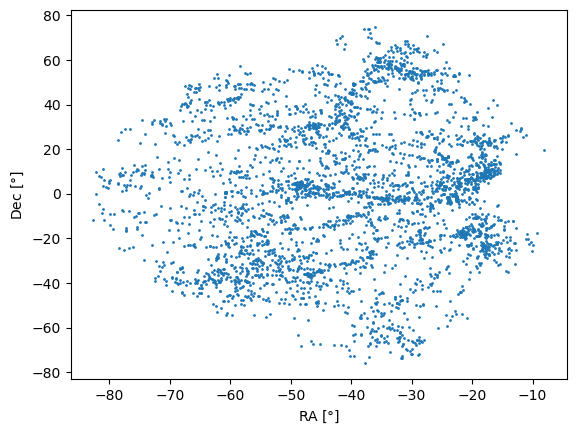

In [30]:
plt.scatter(X[X<0], Y[X<0], s=1)
plt.xlabel(r'RA [$\degree$]')
plt.ylabel(r'Dec [$\degree$]')
plt.savefig('alfalfa.pdf')

In [31]:
len(X[X<0])

3682